<a href="https://colab.research.google.com/github/VishnuVijay01/Customer_Analysis-DSML_Project/blob/main/Customer_Analysis_Using_Various_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

**Loading The Dataset**

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1QdKB2YUZseVOoSH3LVVOHKA_7lq9Cb9-"
data = pd.read_csv(url)

**Data Preprocessing And Analysis**

   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status  \
0             0           0  5524        1957        S1         Lajang   
1             1           1  2174        1954        S1         Lajang   
2             2           2  4141        1965        S1    Bertunangan   
3             3           3  6182        1984        S1    Bertunangan   
4             4           4  5324        1981        S3        Menikah   

       Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth  \
0  58138000.0        0         0  04-09-2012  ...                  7   
1  46344000.0        1         1  08-03-2014  ...                  5   
2  71613000.0        0         0  21-08-2013  ...                  4   
3  26646000.0        1         0  10-02-2014  ...                  6   
4  58293000.0        1         0  19-01-2014  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0    

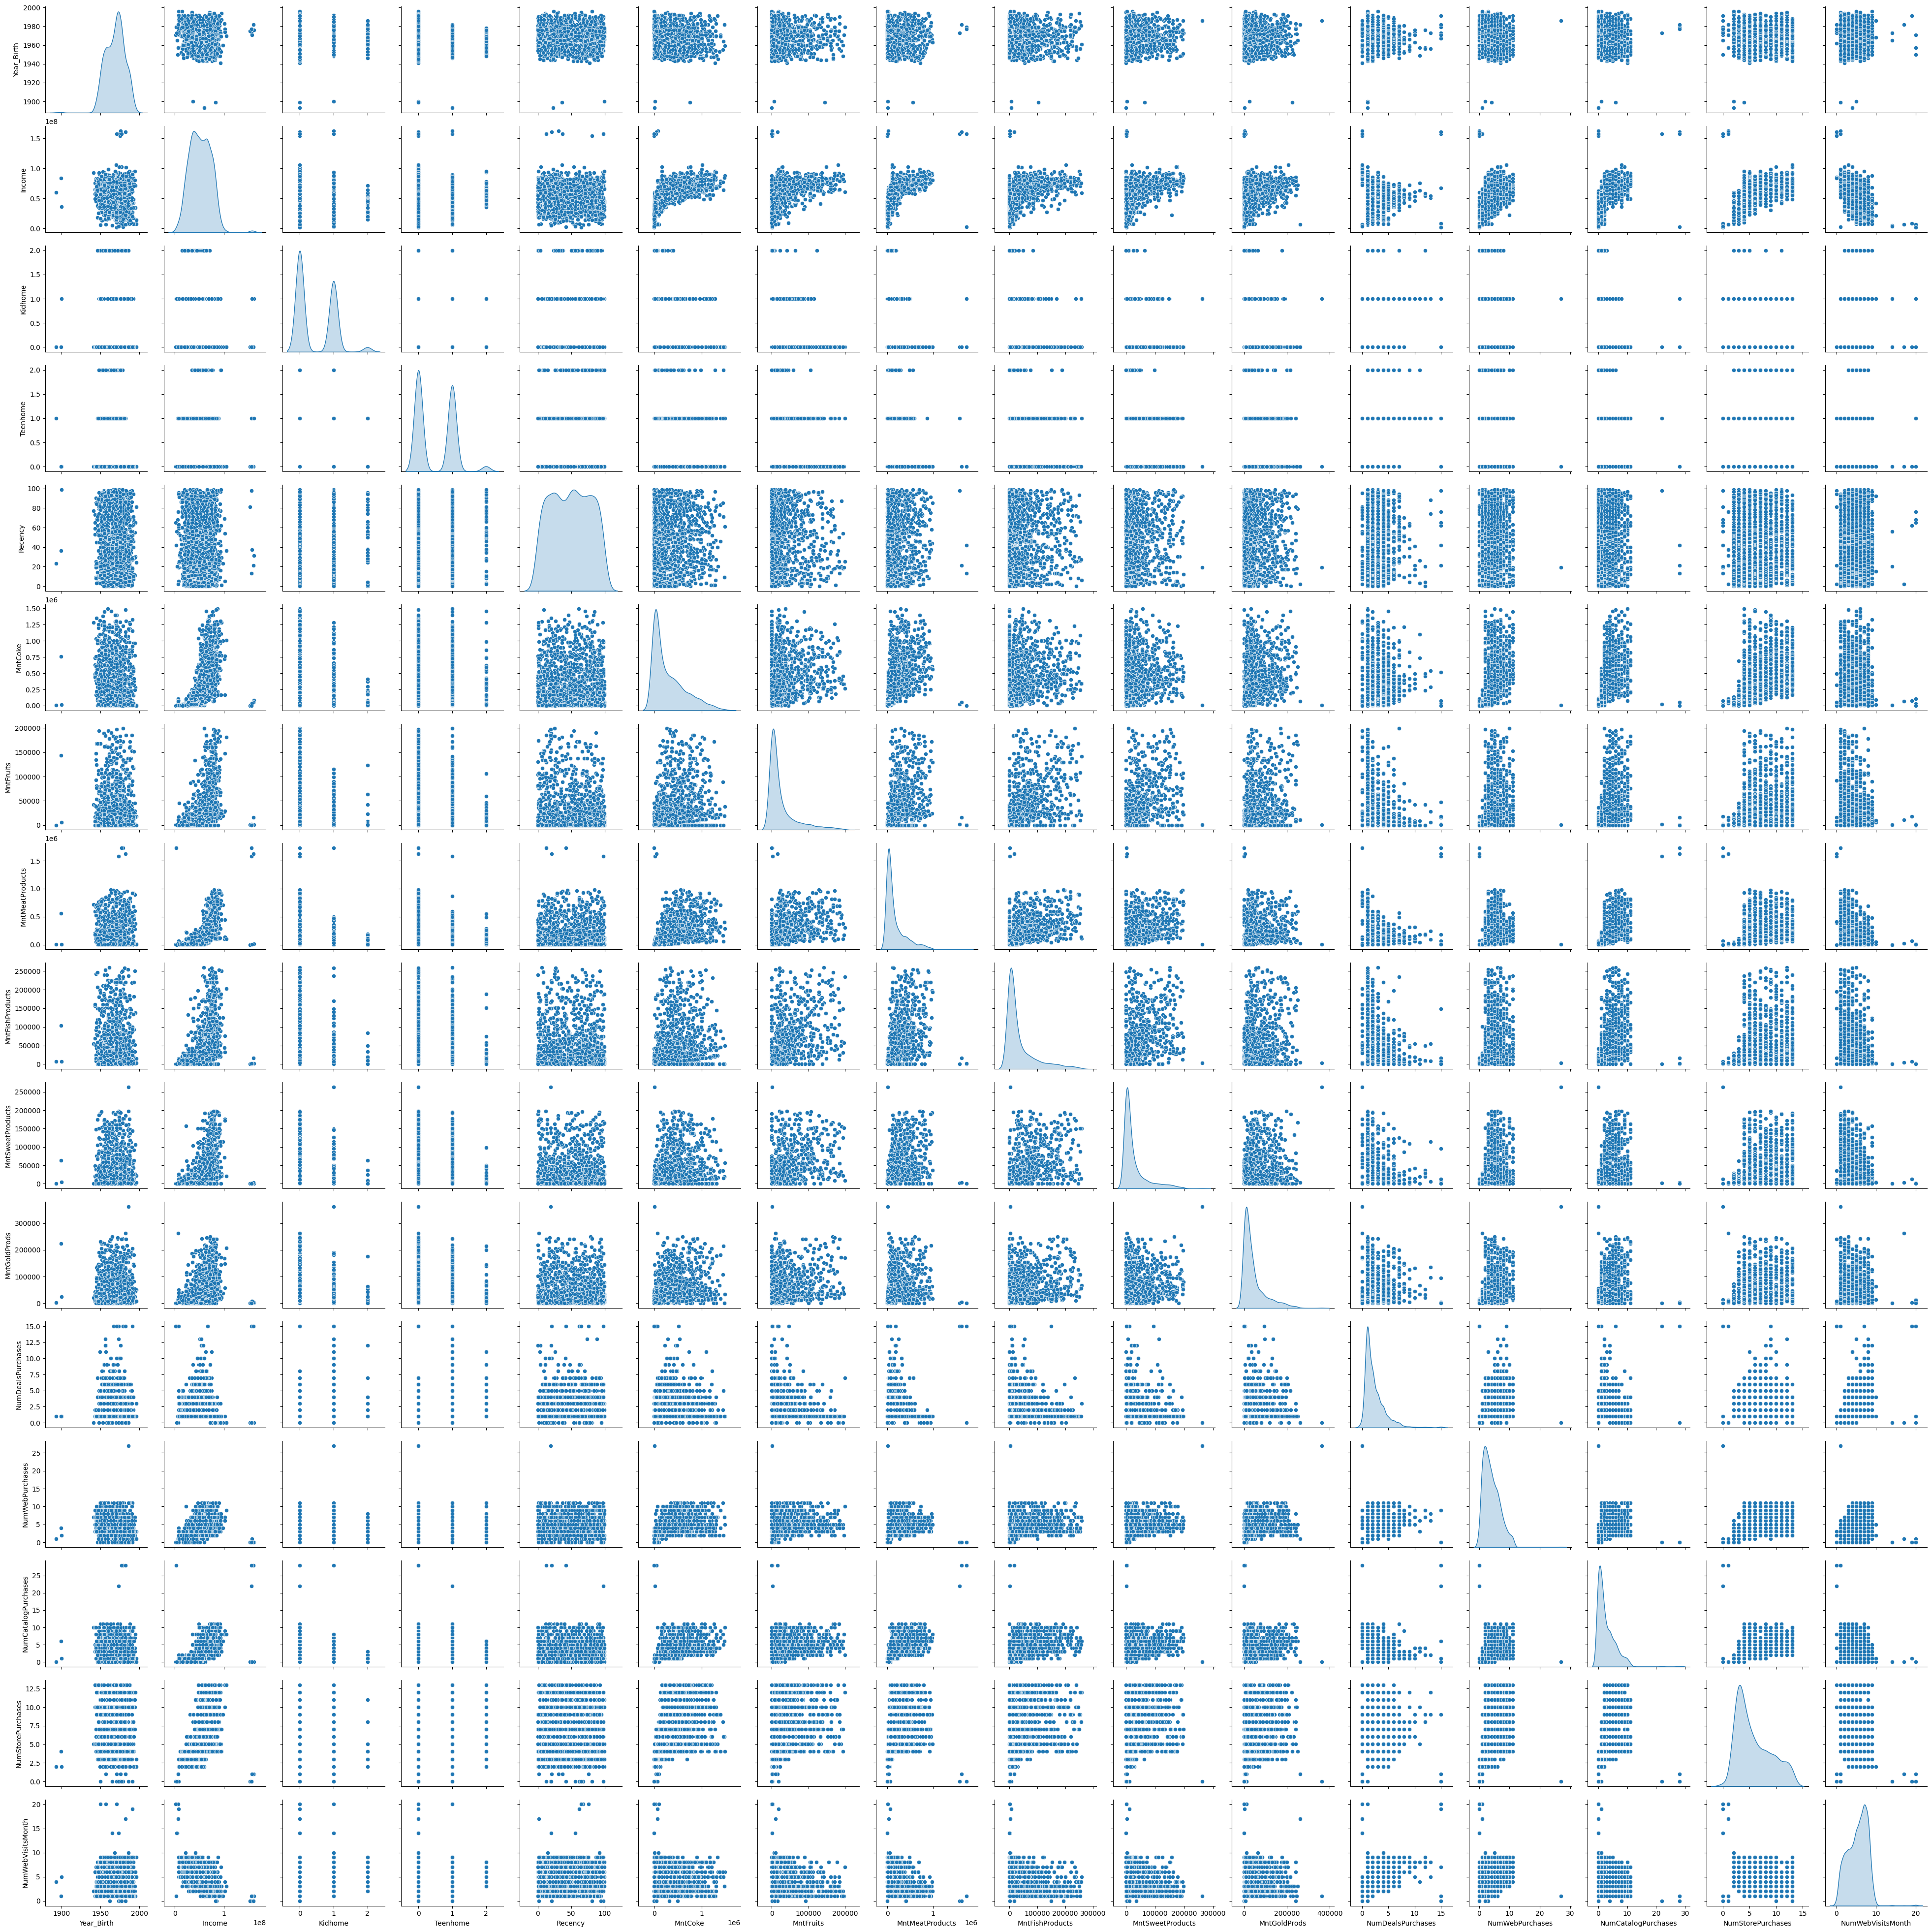

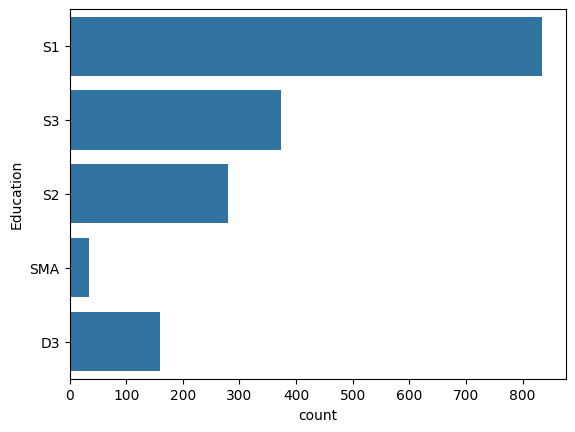

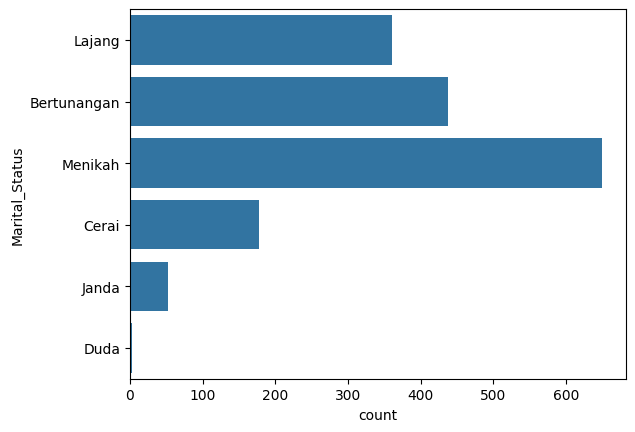

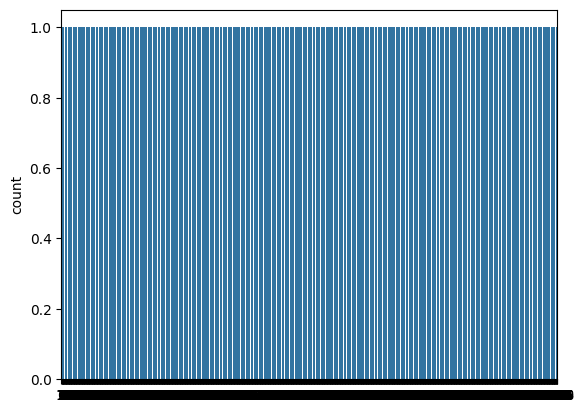

In [ ]:
# Exploratory Data Analysis
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize distribution of numeric variables
numeric_vars = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency','MntCoke', 'MntFruits',
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
sns.pairplot(data[numeric_vars], diag_kind='kde')
plt.show()

# Visualize categorical variables
cat_vars = ['Education', 'Marital_Status', 'Complain']
for var in cat_vars:
    sns.countplot(data[var])
    plt.show()


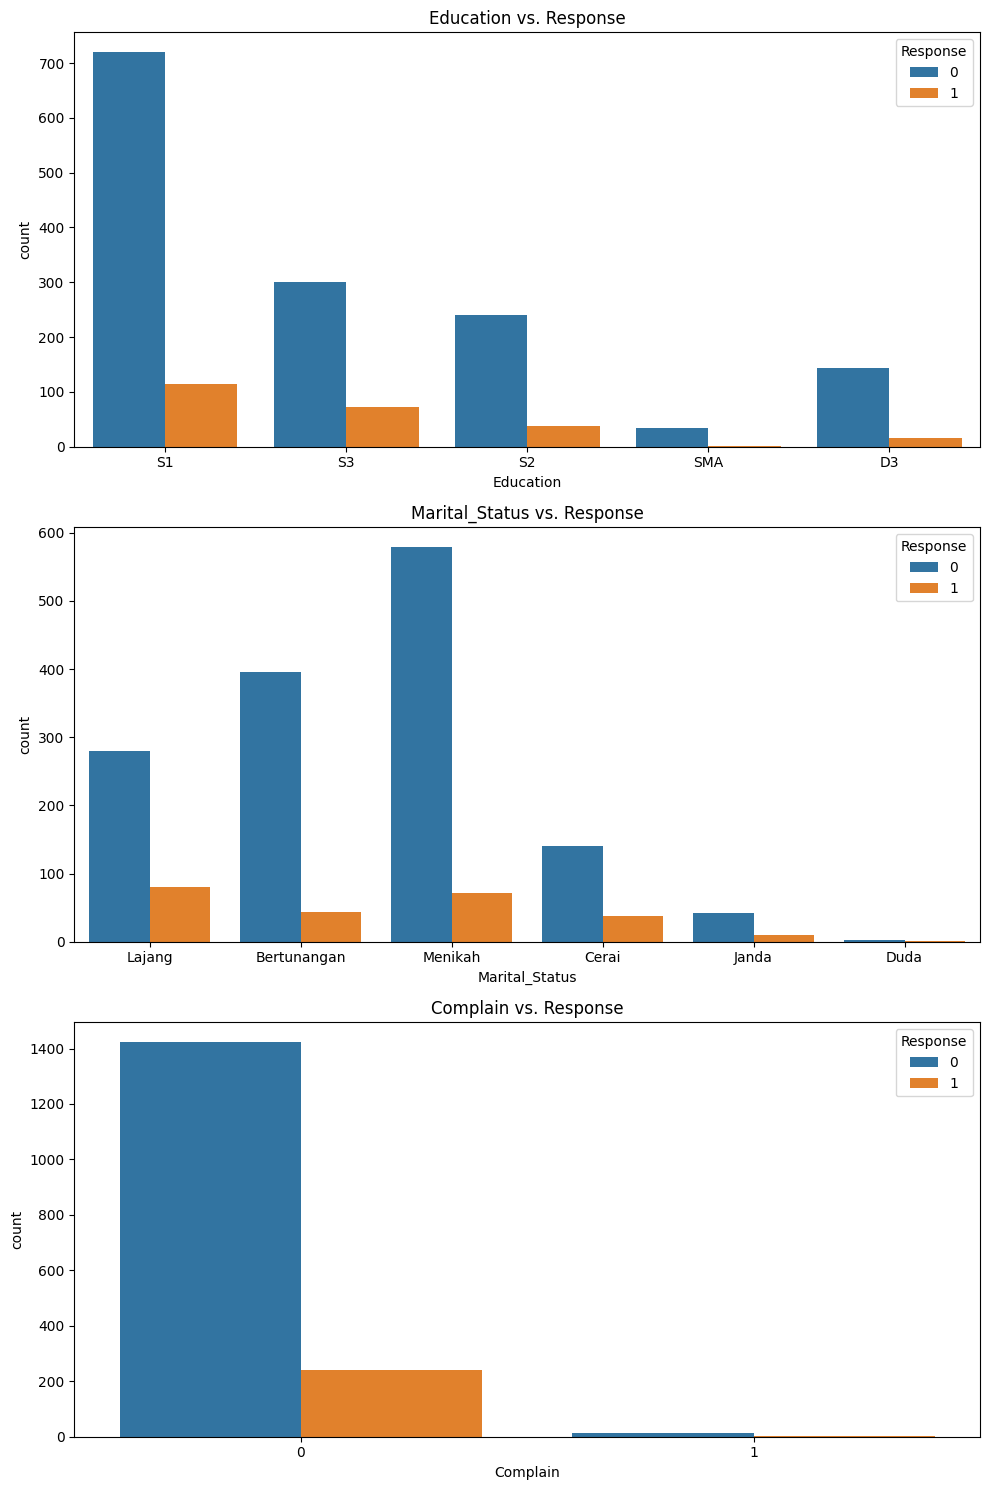

In [ ]:
# Set up the subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Education vs. Response
sns.countplot(x='Education', hue='Response', data=data, ax=axes[0])
axes[0].set_title('Education vs. Response')

# Plot for Marital_Status vs. Response
sns.countplot(x='Marital_Status', hue='Response', data=data, ax=axes[1])
axes[1].set_title('Marital_Status vs. Response')

# Plot for Complain vs. Response
sns.countplot(x='Complain', hue='Response', data=data, ax=axes[2])
axes[2].set_title('Complain vs. Response')

plt.tight_layout()
plt.show()


**Feature Engineering**

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

# Drop unnecessary columns
data.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)


**Model Building And Classification - Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming data contains features X and target variable y

# Remove rows with missing values
data.dropna(inplace=True)

# Split the data into training and testing sets
X = data.drop('Response', axis=1)
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in y_train (if applicable)
# Assuming no missing values in y_train for classification problem

# Print the shapes of X_train_scaled and y_train to verify alignment
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use transform only for test data to avoid data leakage

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Shape of X_train_scaled: (1330, 37)
Shape of y_train: (1330,)
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       284
           1       0.78      0.29      0.42        49

    accuracy                           0.88       333
   macro avg       0.83      0.64      0.68       333
weighted avg       0.87      0.88      0.86       333

[[280   4]
 [ 35  14]]


**Hyperparameter Optimisation**

In [ ]:
# Import the GridSearchCV class
from sklearn.model_selection import GridSearchCV

# Grid search for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid, cv=5, verbose=2)
rf_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:")
print(rf_grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_de

**Evaluate models with best hyperparameters**

In [ ]:
# Evaluate Random Forest with best hyperparameters
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       284
           1       0.56      0.18      0.28        49

    accuracy                           0.86       333
   macro avg       0.72      0.58      0.60       333
weighted avg       0.83      0.86      0.83       333

[[277   7]
 [ 40   9]]


**Clustering Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

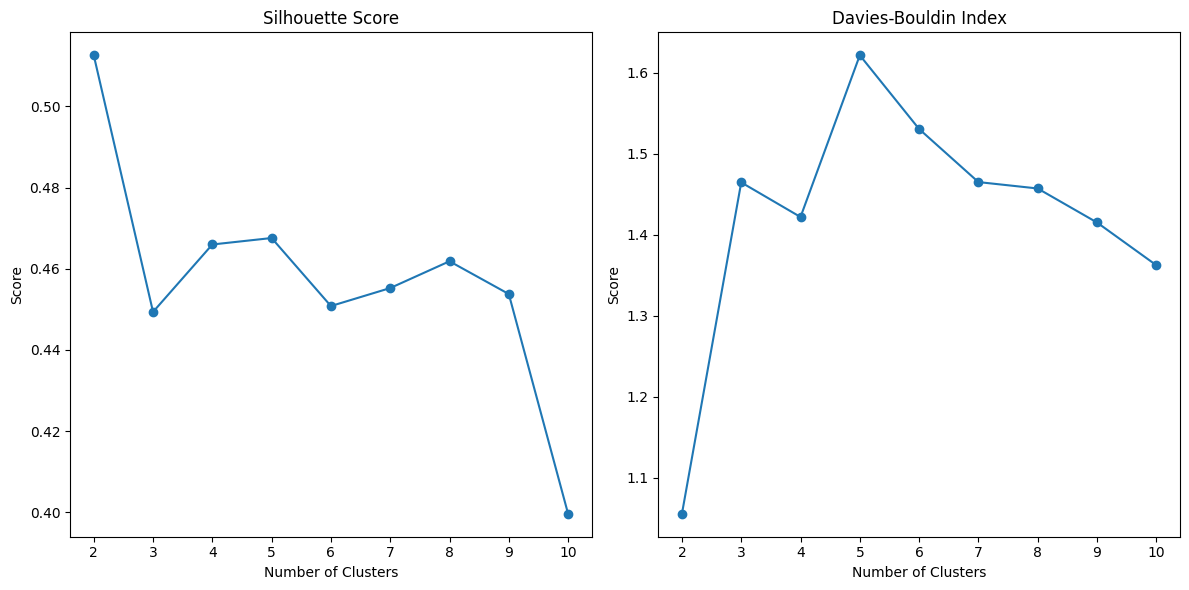

In [ ]:
# Selecting relevant features for clustering
clustering_data = data[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds']]

# Standardize features
scaler_cluster = StandardScaler()
clustering_data_scaled = scaler_cluster.fit_transform(clustering_data)

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate clustering metrics for different numbers of clusters
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 11)  # Testing clusters from 2 to 10

for k in k_values:
    # Initialize KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)

    # Predict clusters
    labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(clustering_data_scaled, labels))

    # Calculate Davies-Bouldin index
    davies_bouldin_scores.append(davies_bouldin_score(clustering_data_scaled, labels))

# Plot the clustering metrics against the number of clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [ ]:
# Assign clusters to data
data['Cluster'] = kmeans.labels_

# Profile each cluster
cluster_profiles = data.groupby('Cluster').mean()

# Display cluster profiles
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
         Unnamed: 0.1  Unnamed: 0   Year_Birth        Income   Kidhome  \
Cluster                                                                  
0          850.496222  850.496222  1970.863980  3.616685e+07  0.773300   
1          889.647059  889.647059  1965.247059  7.069974e+07  0.047059   
2          797.189655  797.189655  1965.577586  6.945121e+07  0.146552   
3          885.438596  885.438596  1969.385965  7.807726e+07  0.035088   
4          874.196970  874.196970  1968.045455  6.877729e+07  0.090909   
5          805.797101  805.797101  1968.202899  8.075548e+07  0.043478   
6          837.563218  837.563218  1966.482759  6.180664e+07  0.149425   
7          844.465909  844.465909  1968.431818  7.262692e+07  0.079545   
8          703.000000  703.000000  1968.939394  7.808539e+07  0.000000   
9          842.809701  842.809701  1966.582090  5.526328e+07  0.302239   

         Teenhome    Recency        MntCoke      MntFruits  MntMeatProducts  \
Cluster       

In [ ]:
# Analyze key traits and differences between clusters
for cluster in range(k):
    print(f"\nCluster {cluster}:")
    print(data[data['Cluster'] == cluster].describe())


Cluster 0:
       Unnamed: 0.1   Unnamed: 0   Year_Birth        Income     Kidhome  \
count    794.000000   794.000000   794.000000  7.940000e+02  794.000000   
mean     850.496222   850.496222  1970.863980  3.616685e+07    0.773300   
std      487.644999   487.644999    11.464805  1.481529e+07    0.520929   
min        1.000000     1.000000  1893.000000  1.730000e+06    0.000000   
25%      420.250000   420.250000  1963.000000  2.678175e+07    0.000000   
50%      853.500000   853.500000  1972.000000  3.569600e+07    1.000000   
75%     1275.500000  1275.500000  1978.000000  4.505250e+07    1.000000   
max     1679.000000  1679.000000  1996.000000  1.623970e+08    2.000000   

         Teenhome     Recency        MntCoke     MntFruits  MntMeatProducts  \
count  794.000000  794.000000     794.000000    794.000000       794.000000   
mean     0.510076   49.089421   57021.410579   4268.261965     23362.720403   
std      0.543701   29.363372   84199.102265   5686.188240     23504.112396

**Marketing strategies for each cluster**

<ipython-input-12-4dfa30565ad2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='viridis')


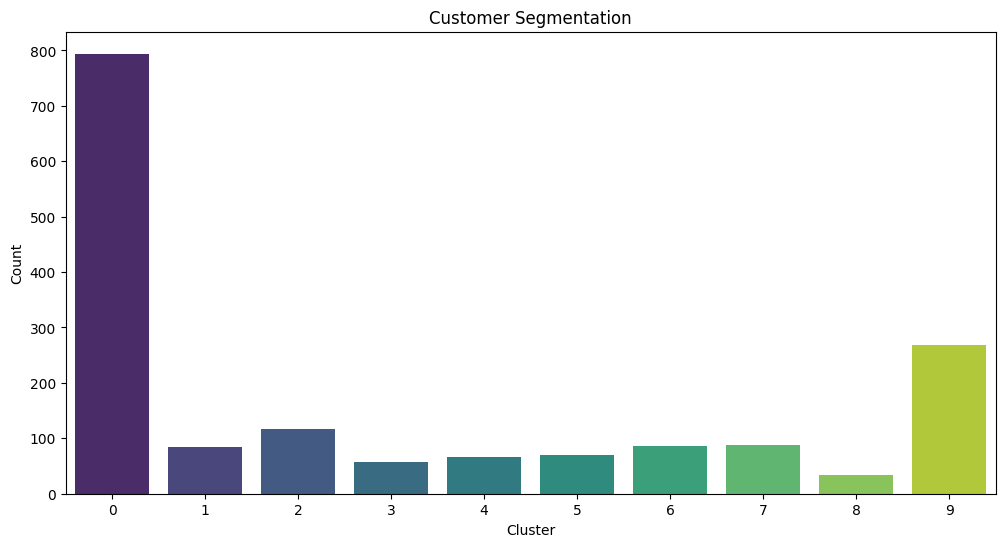


Marketing Strategies for Cluster 0:

Marketing Strategies for Cluster 1:

Marketing Strategies for Cluster 2:

Marketing Strategies for Cluster 3:

Marketing Strategies for Cluster 4:

Marketing Strategies for Cluster 5:

Marketing Strategies for Cluster 6:

Marketing Strategies for Cluster 7:

Marketing Strategies for Cluster 8:

Marketing Strategies for Cluster 9:


In [ ]:
# Visualize customer segmentation
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Tailor marketing strategies for each cluster
for cluster in range(k):
    print(f"\nMarketing Strategies for Cluster {cluster}:")
# Implement specific marketing strategies based on the characteristics of each cluster

**Model Building And Classification - Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)
log_reg_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_log_reg = log_reg_classifier.predict(X_test_scaled)

# Evaluate
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       284
           1       0.56      0.39      0.46        49

    accuracy                           0.86       333
   macro avg       0.73      0.67      0.69       333
weighted avg       0.85      0.86      0.85       333

[[269  15]
 [ 30  19]]


**Hyperparameter Optimization for Logistic Regression**

In [ ]:
# Grid search for Logistic Regression
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

log_reg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                                   param_grid=log_reg_param_grid, cv=5, verbose=2)
log_reg_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Logistic Regression:")
print(log_reg_grid_search.best_params_)

# Evaluate Logistic Regression with best hyperparameters
best_log_reg = log_reg_grid_search.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

**Model Building With Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_classifier = SVC(kernel='rbf', random_state=42, probability=True)
svm_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       284
           1       0.65      0.22      0.33        49

    accuracy                           0.87       333
   macro avg       0.76      0.60      0.63       333
weighted avg       0.85      0.87      0.84       333

[[278   6]
 [ 38  11]]


**Hyperparameter Optimization for SVM**

In [ ]:
# Grid search for SVM
svm_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(SVC(random_state=42), param_grid=svm_param_grid, cv=5, verbose=2)
svm_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for SVM:")
print(svm_grid_search.best_params_)

# Evaluate SVM with best hyperparameters
best_svm = svm_grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.001, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ..................C=0.001, gamma=scale

**Model Building And Classification - Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Evaluate
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       284
           1       0.67      0.37      0.47        49

    accuracy                           0.88       333
   macro avg       0.78      0.67      0.70       333
weighted avg       0.86      0.88      0.86       333

[[275   9]
 [ 31  18]]


**Hyperparameter Optimization for Gradient Boosting**

In [ ]:
# Grid search for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                              param_grid=gb_param_grid, cv=5, verbose=2)
gb_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Gradient Boosting:")
print(gb_grid_search.best_params_)

# Evaluate Gradient Boosting with best hyperparameters
best_gb = gb_grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

**Performance of Each Model**

In [ ]:
from sklearn.metrics import accuracy_score

# Define a function to print evaluation metrics and confusion matrix
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Evaluate Random Forest
print("Random Forest:")
evaluate_model(y_test, y_pred)
print()

# Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(y_test, y_pred_log_reg)
print()

# Evaluate SVM
print("Support Vector Machine:")
evaluate_model(y_test, y_pred_svm)
print()

# Evaluate Gradient Boosting
print("Gradient Boosting:")
evaluate_model(y_test, y_pred_gb)


Random Forest:
Accuracy: 0.8828828828828829
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       284
           1       0.78      0.29      0.42        49

    accuracy                           0.88       333
   macro avg       0.83      0.64      0.68       333
weighted avg       0.87      0.88      0.86       333

Confusion Matrix:
[[280   4]
 [ 35  14]]

Logistic Regression:
Accuracy: 0.8738738738738738
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       284
           1       0.61      0.39      0.47        49

    accuracy                           0.87       333
   macro avg       0.76      0.67      0.70       333
weighted avg       0.86      0.87      0.86       333

Confusion Matrix:
[[272  12]
 [ 30  19]]

Support Vector Machine:
Accuracy: 0.8768768768768769
Classification Report:
              precision    recall  f1-score   

**Optimising Hyperparameter Using Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid, cv=5, verbose=2)
rf_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:")
print(rf_grid_search.best_params_)
print()

# Grid search for Logistic Regression
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

log_reg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                                   param_grid=log_reg_param_grid, cv=5, verbose=2)
log_reg_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Logistic Regression:")
print(log_reg_grid_search.best_params_)
print()

# Grid search for SVM
svm_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(SVC(random_state=42), param_grid=svm_param_grid, cv=5, verbose=2)
svm_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for SVM:")
print(svm_grid_search.best_params_)
print()

# Grid search for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                              param_grid=gb_param_grid, cv=5, verbose=2)
gb_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Gradient Boosting:")
print(gb_grid_search.best_params_)
print()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_de

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best parameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l2'}

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.001, gamma=scale, kernel=po

**Optimising Hyperparameter Using Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random search for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      param_distributions=rf_param_grid, n_iter=10, cv=5, verbose=2,
                                      random_state=42)
rf_random_search.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest (Random Search):")
print(rf_random_search.best_params_)
print()

# Random search for Logistic Regression
log_reg_random_search = RandomizedSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                                          param_distributions=log_reg_param_grid, n_iter=10, cv=5, verbose=2,
                                          random_state=42)
log_reg_random_search.fit(X_train_scaled, y_train)

print("Best parameters for Logistic Regression (Random Search):")
print(log_reg_random_search.best_params_)
print()

# Random search for SVM
svm_random_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=svm_param_grid,
                                       n_iter=10, cv=5, verbose=2, random_state=42)
svm_random_search.fit(X_train_scaled, y_train)

print("Best parameters for SVM (Random Search):")
print(svm_random_search.best_params_)
print()

# Random search for Gradient Boosting
gb_random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                                      param_distributions=gb_param_grid, n_iter=10, cv=5, verbose=2,
                                      random_state=42)
gb_random_search.fit(X_train_scaled, y_train)

print("Best parameters for Gradient Boosting (Random Search):")
print(gb_random_search.best_params_)
print()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=Non

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best parameters for Logistic Regression (Random Search):
{'penalty': 'l2', 'C': 0.1}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................C=100, gamma=auto, kernel=poly; total time=   0.1s
[CV] END .....................C=100, gamma=auto, kernel=poly; total time=   0.1s
[CV] END .....................C=100, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=s

**ROC Curve**

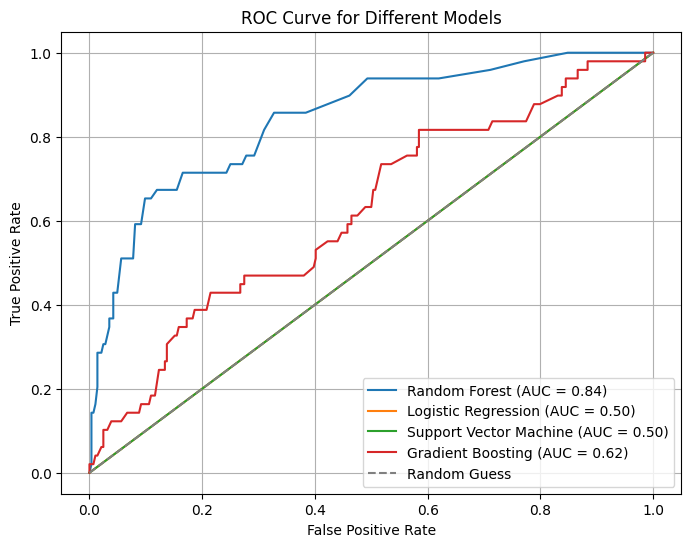

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities and true labels for each model
y_proba_rf = rf_classifier.predict_proba(X_test_imputed)[:, 1]
y_proba_lr = log_reg_classifier.predict_proba(X_test_imputed)[:, 1]
y_proba_svm = svm_classifier.predict_proba(X_test_imputed)[:, 1]
y_proba_gb = gb_classifier.predict_proba(X_test_imputed)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

# Calculate AUC-ROC score for each model
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_svm = roc_auc_score(y_test, y_proba_svm)
auc_gb = roc_auc_score(y_test, y_proba_gb)

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()


**Checking And Comparing Each Model**

In [ ]:
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("="*50)


Training Random Forest...
Random Forest Accuracy: 0.8829
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       284
           1       0.78      0.29      0.42        49

    accuracy                           0.88       333
   macro avg       0.83      0.64      0.68       333
weighted avg       0.87      0.88      0.86       333

[[280   4]
 [ 35  14]]
Training Logistic Regression...
Logistic Regression Accuracy: 0.8649
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       284
           1       0.56      0.39      0.46        49

    accuracy                           0.86       333
   macro avg       0.73      0.67      0.69       333
weighted avg       0.85      0.86      0.85       333

[[269  15]
 [ 30  19]]
Training Support Vector Machine...
Support Vector Machine Accuracy: 0.8679
              precision    recall  f1-score   support

           0       0.88      0.98      0.93 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')